# HOG, Corners and Edges as Features
- Corners are regions in the image with large variation in intensity in all directions
- Harris corner detection fins the difference in intensity for a displacement of $(u, v)$ in all directions
- OpenCV has the function cv2.cornerHarris(img, block sie, ksize, k)
- img - input image, it should be grayscale and float32 type
- blockSize - it is the size of neighborhood considered for corner detection
- ksize - Aperture parameter of Sobel derivative used
- k - Harris detector free parameter in equation (set to 0.1)

# Edges are identified when change in intensity is noticed in one direction
# Corners are identified when shifting a window in any direciton over that point

# HOG - Histogram of Oriented Gradients (Vector)
- Gradient magnitude
- Gradient Angle
- HOGs are a feature descriptor used for object detection
- HOGS along with SVM (support vector machine) classifiers work well for object detection
- HOGS applie a sliding window detector over an image and HOG descriptor is computed for each position
- HOG takes care of the scaling issues by changing image sclae(pyramiding)

# LOAD/DISPLAY IMAGE

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.feature import hog
%matplotlib inline

In [3]:
image_color = cv2.imread('diamond.jpg')
cv2.imshow('Find diamond', image_color)
cv2.waitKey()
cv2.destroyAllWindows()

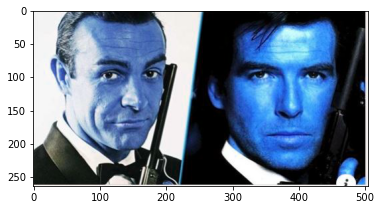

In [4]:
plt.imshow(image_color)

# CONVERT TO GREYSCALE

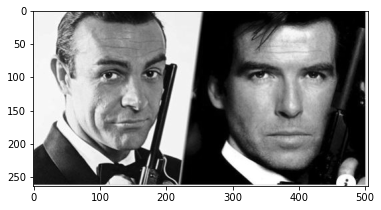

In [5]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

In [6]:
image_gray.shape

(264, 505)

In [7]:
# Sobel Calculations
x_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize = 7)
cv2.imshow('Sobel -X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# Sobel Calculation
y_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - Y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

# PERFORM HISTOGRAM OF ORIENTED GRADIENT

In [31]:
features, hog_image = hog(image_gray,
                          orientations = 25,
                          pixels_per_cell = (16, 16),
                          cells_per_block = (1, 1),
                          transform_sqrt = False,  
                          visualize = True,   
                          feature_vector = False )
features.shape

(16, 31, 1, 1, 25)

In [32]:
features[10, 25, :]

array([[[0.23217306, 0.14944361, 0.09914881, 0.15949148, 0.22781311,
         0.20675598, 0.23217306, 0.23217306, 0.12200778, 0.20983435,
         0.23217306, 0.08389991, 0.23217306, 0.20285695, 0.23217306,
         0.23217306, 0.21291616, 0.09570428, 0.23217306, 0.23217306,
         0.14587317, 0.13424489, 0.23217306, 0.23217306, 0.23217306]]])

In [33]:
hog_image.shape

(264, 505)

In [36]:
# Return image after stretching or shrinking its intensity levels
from skimage import exposure
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 2))

Text(0.5, 1.0, 'Hog feature')

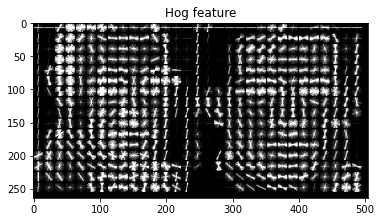

In [37]:
plt.figure()
plt.imshow(hog_image_rescaled, cmap = 'gray')
plt.title('Hog feature')